## Functions

### Data Loaders

In [ ]:
# mounts google drive and loads CSV file into pandas
def load_data_from_drive(folder_path, file_name):
    drive.mount('/content/drive')

    # file path
    file_path = os.path.join(folder_path, file_name)
    file_extension = os.path.splitext(file_name)[-1].lower()
    # read file
    try:
         if file_extension == '.csv':
            data = pd.read_csv(file_path, delimiter=',')
            return data
         elif file_extension == '.json':
            with open(file_path, 'r') as f:
                data = json.load(f)
            return data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        return None



In [ ]:
from google.colab import drive
import pandas as pd
import os
from sklearn.decomposition import PCA
import numpy as np
import json
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import plotly.express as px

In [ ]:
FOLDER_PATH = '/content/drive/MyDrive/USML Final Project/facebook_large'
features_file_path = 'musae_facebook_features.json'
features_data = load_data_from_drive(FOLDER_PATH, features_file_path)
print(features_data)


Mounted at /content/drive
{'554': [2835, 4518, 2198, 2014, 3818, 3045, 4570, 4585, 4596, 4599, 4609, 4617, 4627, 4641, 4643, 4651, 4665, 4676, 4682, 4694, 4696, 4708], '10772': [3293, 2534, 979, 2014, 2317], '6350': [4477, 2895, 4039, 3282, 765, 2669], '9218': [3133, 2052, 979, 3355, 107, 1878, 1105, 4571, 4582, 4593, 4598, 4609, 4619, 4629, 4636, 4642, 4652, 4662, 4675, 4683, 4689, 4704, 4713], '7787': [1151, 631, 2613, 2791, 648, 1684, 3818, 107, 1878, 1105, 4570, 4585, 4596, 4599, 4613, 4618, 4628, 4640, 4647, 4651, 4668, 4670, 4678, 4695, 4696, 4708], '756': [3232, 4193, 296, 1337, 2832, 1437, 4572, 4587, 4590, 4605, 4613, 4615, 4632, 4634, 4643, 4659, 4660, 4673, 4686, 4687, 4700, 4713], '21527': [3383, 3832, 4328, 3939, 2332, 2566, 3244, 66], '4506': [2835, 2320, 3643, 2926, 3320, 1792, 3056, 4575, 4584, 4594, 4599, 4611, 4621, 4629, 4639, 4646, 4654, 4667, 4672, 4682, 4693, 4699, 4711], '18282': [1080, 1326, 2158, 2868, 4173, 2118, 4479, 448, 4575, 4583, 4592, 4597, 4612, 4622, 

In [ ]:
target_df = load_data_from_drive(FOLDER_PATH, 'musae_facebook_target.csv')
print(target_df.head)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<bound method NDFrame.head of           id       facebook_id                                     page_name  \
0          0   145647315578475                      The Voice of China 中国好声音   
1          1      191483281412                 U.S. Consulate General Mumbai   
2          2   144761358898518                                          ESET   
3          3   568700043198473  Consulate General of Switzerland in Montreal   
4          4  1408935539376139             Mark Bailey MP - Labor for Miller   
...      ...               ...                                           ...   
22465  22465  1379955382222841                               Kurt Wiegel MdL   
22466  22466  1651527995097082                                dubdub Stories   
22467  22467   155369444540412            Ministerio del Interior - Paraguay   
22468  22468   175067819212798           

In [ ]:
features_df = pd.DataFrame.from_dict(features_data, orient='index')
print(features_df.head)

<bound method NDFrame.head of          0     1     2       3       4       5       6       7       8   \
554    2835  4518  2198  2014.0  3818.0  3045.0  4570.0  4585.0  4596.0   
10772  3293  2534   979  2014.0  2317.0     NaN     NaN     NaN     NaN   
6350   4477  2895  4039  3282.0   765.0  2669.0     NaN     NaN     NaN   
9218   3133  2052   979  3355.0   107.0  1878.0  1105.0  4571.0  4582.0   
7787   1151   631  2613  2791.0   648.0  1684.0  3818.0   107.0  1878.0   
...     ...   ...   ...     ...     ...     ...     ...     ...     ...   
21828  1748   723  3492  2032.0  3110.0   107.0     NaN     NaN     NaN   
1421    806  3832  4328  3129.0    16.0  1053.0   809.0     NaN     NaN   
19147  3383  4391  3381  2726.0  2535.0   823.0   113.0     NaN     NaN   
13411  3133  1865  1684  3110.0  3818.0   107.0  1878.0  3045.0     NaN   
2750   3399  2854  3601   633.0  3110.0   107.0  3045.0  4570.0  4580.0   

           9   ...      21      22      23      24      25  26  27  2

In [ ]:
features_df.index = features_df.index.astype(int)
features_df = features_df.sort_index()
target_df = target_df.sort_values(by="id").reset_index(drop=True)
combined_df = target_df.merge(features_df, left_on="id", right_index=True)

# Replace NaN in the features with 0 (sparse data assumption)
feature_columns = features_df.columns
combined_df[feature_columns] = combined_df[feature_columns].fillna(0)

# Check combined dataset structure
combined_df.head()

id       facebook_id                                     page_name  \
0   0   145647315578475                      The Voice of China 中国好声音   
1   1      191483281412                 U.S. Consulate General Mumbai   
2   2   144761358898518                                          ESET   
3   3   568700043198473  Consulate General of Switzerland in Montreal   
4   4  1408935539376139             Mark Bailey MP - Labor for Miller   

    page_type     0     1     2       3       4       5  ...      21      22  \
0      tvshow  3133  3825   236   874.0  1072.0   143.0  ...     0.0     0.0   
1  government  3399   597   979  2014.0     0.0     0.0  ...     0.0     0.0   
2     company  3383  3832  2035   765.0  3972.0  3364.0  ...  4688.0  4697.0   
3  government  2710  1960  1940  4514.0  4339.0   761.0  ...     0.0     0.0   
4  politician  2873  4518  4535  1602.0  3500.0  4457.0  ...     0.0     0.0   

       23   24   25   26   27   28   29   30  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  4713.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 35 columns]

PCA AND T-SNE

In [ ]:
features = combined_df[feature_columns].values
labels = combined_df["page_type"]

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Add PCA components to the dataset for visualization
combined_df["PCA-1"] = pca_result[:, 0]
combined_df["PCA-2"] = pca_result[:, 1]
# Plot the PCA results
fig = px.scatter(
    combined_df,
    x="PCA-1",
    y="PCA-2",
    color="page_type",  # Use the category labels for color
    hover_data=["page_name"],  # Optional: add labels for interactivity
    title="PCA Visualization of Features",
    labels={"page_type": "Category"}
)
fig.show()

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(features)
combined_df["t-SNE-1"] = X_tsne[:, 0]
combined_df["t-SNE-2"] = X_tsne[:, 1]

# Plot t-SNE using Plotly
fig = px.scatter(
    combined_df,
    x="t-SNE-1",
    y="t-SNE-2",
    color="page_type",  # Use the category labels for color
    hover_data=["page_name"],  # Optional: add labels for interactivity
    title="t-SNE Visualization of Features",
    labels={"page_type": "Category"}
)
fig.show()

Cluster Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

max_iter = 100
n_init = 100
k_range = range(1, 6)

# Store results
wcss = []
bcss = []
silhouette_scores = []
overall_mean = np.mean(scaled_features, axis=0)
tss = np.sum(np.linalg.norm(scaled_features- overall_mean, axis=1) ** 2)
for k in k_range:
    kmeans = KMeans(n_clusters=k, max_iter=max_iter, n_init=n_init, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    bcss_value =  tss - kmeans.inertia_
    bcss.append(bcss_value)
    if k > 1:
        silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)

print("WCSS:", wcss)
print("BCSS:", bcss)
print("Silhouette Scores:", silhouette_scores)


WCSS: [696570.0000000026, 358094.4724365933, 317499.3794884625, 283200.61185058544, 255556.9067835256]
BCSS: [-2.561137080192566e-09, 338475.5275634067, 379070.6205115375, 413369.38814941456, 441013.0932164744]
Silhouette Scores: [None, 0.5098361965503427, 0.5173506925288148, 0.4621171732867389, 0.4623998048964882]


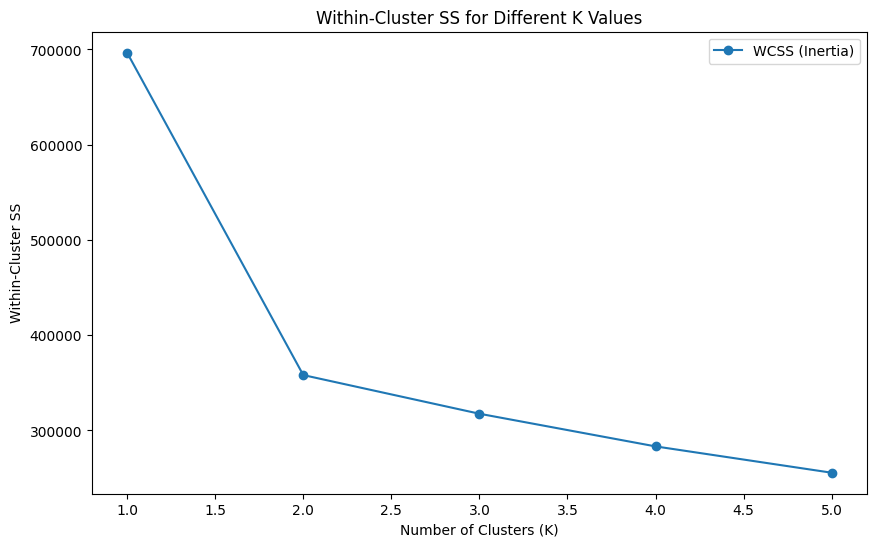

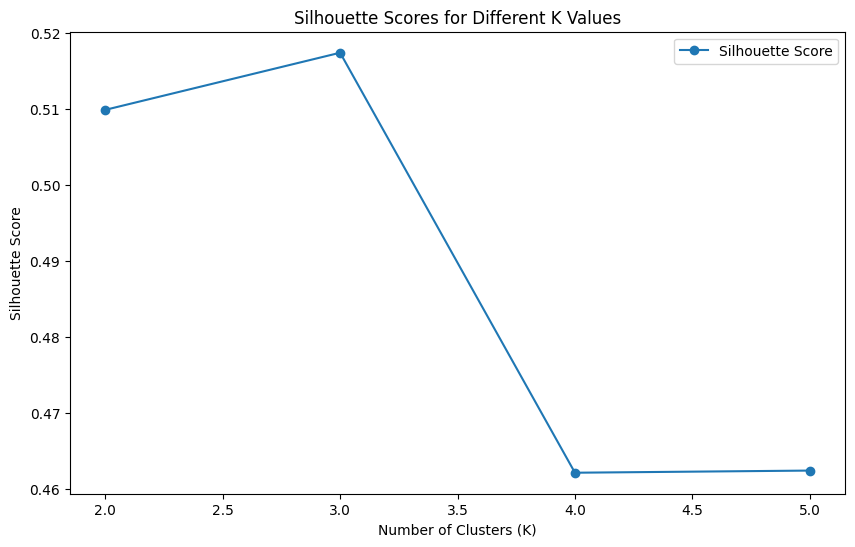

In [ ]:
import matplotlib.pyplot as plt

# Plot WCSS and BCSS vs. Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, label="WCSS (Inertia)", marker='o')
plt.title("Within-Cluster SS for Different K Values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster SS")
plt.legend()
plt.show()

# Plot Silhouette Scores vs. Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range[1:], silhouette_scores[1:], label="Silhouette Score", marker='o')
plt.title("Silhouette Scores for Different K Values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

 Statistical analysis of feature variations


In [ ]:
from scipy.stats import f_oneway, ttest_ind
import seaborn as sns

# Step 1: ANOVA to test feature means between categories
anova_results = {}
for feature in feature_columns:
    feature_values = [combined_df[combined_df["page_type"] == category][feature] for category in combined_df["page_type"].unique()]
    f_stat, p_value = f_oneway(*feature_values)
    anova_results[feature] = {"F-statistic": f_stat, "p-value": p_value}


# Step 3: t-tests for pairwise comparison between categories
t_test_results = {}
categories = combined_df["page_type"].unique()

# Example: Compare "tvshow" vs "government"
for feature in feature_columns:
    group_1 = combined_df[combined_df["page_type"] == "tvshow"][feature]
    group_2 = combined_df[combined_df["page_type"] == "government"][feature]
    t_stat, p_value = ttest_ind(group_1, group_2)
    t_test_results[feature] = {"T-statistic": t_stat, "p-value": p_value}

# Results
print("ANOVA Results:", anova_results)
print("T-test Results:", t_test_results)


ANOVA Results: {0: {'F-statistic': 0.5785699301136863, 'p-value': 0.6290303625976599}, 1: {'F-statistic': 0.6905485697018646, 'p-value': 0.5576803627318372}, 2: {'F-statistic': 0.14591469895768638, 'p-value': 0.9323385185362577}, 3: {'F-statistic': 173.93740616278492, 'p-value': 1.7472573908538236e-111}, 4: {'F-statistic': 65.35713792663402, 'p-value': 4.537581198255919e-42}, 5: {'F-statistic': 45.35018471593147, 'p-value': 3.2865707621606177e-29}, 6: {'F-statistic': 190.20107622926983, 'p-value': 8.276999354693224e-122}, 7: {'F-statistic': 394.6494564528886, 'p-value': 7.621376973435975e-250}, 8: {'F-statistic': 629.2145409934054, 'p-value': 0.0}, 9: {'F-statistic': 779.9045807444011, 'p-value': 0.0}, 10: {'F-statistic': 785.2519527964292, 'p-value': 0.0}, 11: {'F-statistic': 788.531681975246, 'p-value': 0.0}, 12: {'F-statistic': 794.4287035074999, 'p-value': 0.0}, 13: {'F-statistic': 799.1356950203882, 'p-value': 0.0}, 14: {'F-statistic': 801.9607219960205, 'p-value': 0.0}, 15: {'F-s